# Task 3: Predictive Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve

In [2]:
customer_profile = pd.read_csv('../dataset/customer_profile_kmeans.csv', sep='\t', index_col=0)
customer_profile

,I,Iu,Imax,E,Savg,R,F,M,label
CustomerID,,,,,,,,,
12347.0,1.260138,0.828935,1.118514,0.596106,1.028455,-0.111631,1.051680,1.329361,high
12348.0,0.762797,-1.045719,1.002501,-0.234484,-0.078943,0.318693,-0.947196,0.107206,medium
12349.0,0.365694,0.672561,1.049961,0.460376,2.213237,-0.609805,0.486511,0.604295,high
12350.0,-0.488674,-0.570285,-0.085825,-0.266793,0.079256,1.264458,-0.661264,-0.679120,medium
12352.0,0.140328,0.479521,-0.523368,0.113496,-0.365728,0.291678,0.465013,0.490875,medium
...,...,...,...,...,...,...,...,...,...
18280.0,-1.565374,-0.958657,-1.517177,-0.754566,-0.572656,0.818253,-1.019928,-1.071192,low
18281.0,-1.431965,-1.253384,-1.339824,-0.758092,-1.645348,-1.643314,-1.292110,-1.716329,low
18282.0,-0.995868,-0.808002,-1.087385,0.041496,-1.527260,1.019717,-0.880797,-1.089162,low


In [3]:
customer_profile = customer_profile.to_numpy()

In [4]:
def plot_learning_curve(estimator, X, y, scorer='accuracy', cv=5, train_sizes=np.linspace(.1, 1.0, 5), 
                        shuffle=False, random_state=None):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv,
                                                            scoring=scorer, n_jobs=-1, shuffle=shuffle,
                                                            random_state=random_state)

    mean_train_score = np.mean(train_scores, axis=1)
    std_train_score = np.std(train_scores, axis=1)
    mean_test_score = np.mean(test_scores, axis=1)
    std_test_score = np.std(test_scores, axis=1)

    plt.title(str(estimator.__class__.__name__) + ' learning curve')
    plt.xlabel('training set size')
    plt.ylabel('score')

    plt.plot(train_sizes, mean_train_score, label='train score', color='navy', marker='.', lw=2)
    plt.fill_between(train_sizes, mean_train_score + std_train_score,
                     mean_train_score - std_train_score, color='navy', alpha=0.2)
    plt.plot(train_sizes, mean_test_score, label='cross-validation score', color='darkorange', marker='.', lw=2)
    plt.fill_between(train_sizes, mean_test_score + std_test_score,
                     mean_test_score - std_test_score, color='darkorange', alpha=0.2)

    plt.legend().get_frame().set_facecolor('white')
    plt.show()
    
def highlight_equal(s, value, column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] == value
    return ['background-color: lightyellow' if is_max.any() else '' for v in is_max]

## SVC

In [5]:
from sklearn.svm import SVC

In [6]:
X, y = customer_profile[:, :-1], customer_profile[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

tuned_parameters = {'kernel': ('linear', 'poly', 'rbf'),
                    'C': (0.1, 1, 10, 100, 1000)}

grid = GridSearchCV(SVC(),
                    param_grid=tuned_parameters,
                    scoring='accuracy',
                    cv=5,  # 5 fold cross validation
                    n_jobs=-1,  # use all processors
                    refit=True,  # refit the best model on the full development set
                    return_train_score=True,
                    verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    1.8s finished


In [7]:
df = pd.DataFrame(grid.cv_results_)[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
df.rename(columns={'mean_test_score': 'mean_val_score', 
                   'rank_test_score': 'rank_val_score'}, inplace=True)

df.head(15).style.apply(highlight_equal, value=1, column=['rank_val_score'], axis=1).hide_index()

params,mean_train_score,mean_val_score,rank_val_score
"{'C': 100, 'kernel': 'linear'}",0.999207,0.996512,1
"{'C': 1000, 'kernel': 'linear'}",0.999524,0.996196,2
"{'C': 10, 'kernel': 'linear'}",0.997939,0.994293,3
"{'C': 1, 'kernel': 'linear'}",0.995561,0.993659,4
"{'C': 0.1, 'kernel': 'linear'}",0.991598,0.991755,5
"{'C': 1000, 'kernel': 'rbf'}",0.999841,0.990170,6
"{'C': 10, 'kernel': 'rbf'}",0.995720,0.989221,7
"{'C': 100, 'kernel': 'poly'}",0.998018,0.988270,8
"{'C': 100, 'kernel': 'rbf'}",0.999128,0.987636,9
"{'C': 1, 'kernel': 'rbf'}",0.991202,0.987319,10


In [8]:
accuracy_score(grid.best_estimator_.predict(X_test), y_test)

0.9980988593155894

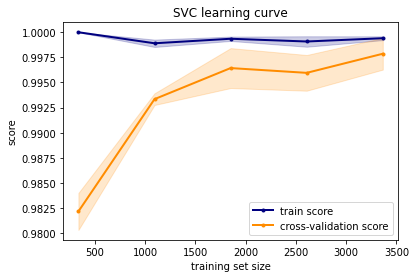

In [9]:
plot_learning_curve(grid.best_estimator_, X, y)

## Naive Bayes

## Random Forest

## Gradient Boosting

## Decision Tree

## K-Nearest Neighbors

## Logistic Regression